# Water age in the Terminos lagoon. Mexico

 Jose-Gilberto Cardoso-Mohedano<sup>2,*</sup>, 
 
Lalo
Marisol
María- Eugenia Allende-Arandía 
Carlos 
 
 Joan Albert Sanchez-Cabeza<sup>3</sup>,
 
Ana Carolina Ruiz-Fernández<sup> 3 </sup>, Mario Alejandro Gómez-Ponce <sup>2</sup> ,



<sup> 1 </sup> Posgrado en Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México; Avenida Ciudad Universitaria 3000, C.P. 04510, Coyoacán, Ciudad de México, México

<sup> 2 </sup>  Estación el Carmen, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Carretera Carmen-Puerto Real km. 9.5, 24157 Ciudad del Carmen, Campeche, México

<sup> 3 </sup>  Unidad Académica Mazatlán, Instituto de Ciencias del Mar y Limnología, Universidad Nacional Autónoma de México, Calzada Joel Montes Camarena s/n, Colonia Playa Sur, Mazatlán 82000, Sinaloa, México



 \*Corresponding Author: gcardoso@cmarl.unam.mx Phone:+52-938-38-31847

[doi:XXXXX](https://XXXX)

## This script plots salinity and temperature data and models the variation in Terminos Lagoon, Mexico.


In [ ]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gsw as gsw
import matplotlib.dates as mdates

In [ ]:
# set up the plotting environment
def makePretryGraphs():
    plt.rcParams["xtick.labelsize"] = 18
    plt.rcParams["ytick.labelsize"] = 18
    sns.set_style("ticks")
    sns.despine(top=False, right=False)

In [ ]:
# read in the csv file
def read_csv_file(filename):
    # read in the csv file
    df = pd.read_csv(filename, sep=",", header=0, decimal=".", encoding="utf-8") 
    return df

In [ ]:
# read salinity and temperature data from csv file 
sal_temp_terminos_file = "..\data\salinity_temperature_climatological_year_terminos_lagoon.csv"



In [ ]:
sal_temp_terminos_rawdata = read_csv_file(sal_temp_terminos_file)

In [ ]:
# print the column names
for col in sal_temp_terminos_rawdata.columns:
    print(col)

In [ ]:
# select the columns of interest
terminos_sal_temp = sal_temp_terminos_rawdata.copy()[
    [
        "Time_model",
        "Salinity_psu_model",
        "Temperature_C_model",
        "Conductivity_microsiemens_cm_average",
        "Temp_C_average",
    ]
]

In [ ]:
# set time as index
terminos_sal_temp["Time_model"] = pd.to_datetime(
    terminos_sal_temp["Time_model"], format="%d/%m/%Y %H:%M"
    )

terminos_sal_temp = terminos_sal_temp.set_index(
    terminos_sal_temp["Time_model"]
    )

In [ ]:
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

In [ ]:
# %% Calculate salinity from hobo conductivity

terminos_sal_temp["sea_level_preasure"] = 0

terminos_sal_temp["salinity_psu"] = gsw.conversions.SP_from_C(
    terminos_sal_temp["Conductivity_microsiemens_cm_average"] / 1000,
    terminos_sal_temp["Temp_C_average"],
    terminos_sal_temp["sea_level_preasure"],
)

In [ ]:
def plot_time_series(df, time, var1, var2, ylabel, ax=None):
    import matplotlib.dates as mdates
    from datetime import datetime

    # If no axes object is passed, create a new figure and axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 12))

    ax.plot_date(df[time], df[var1], "*", color="#440154")
    ax.plot_date(df[time], df[var2], ".", color="#5ec962")

    # Set x-axis limits to January and December of the year in your data
    start_date = datetime(df[time].dt.year.iloc[0], 1, 1)  # January 1
    end_date = datetime(df[time].dt.year.iloc[0], 12, 31)  # December 31

    ax.set_xlim(start_date, end_date)
    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.set_ylabel(ylabel, size=34)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    plt.rc("pdf", fonttype=42)
    

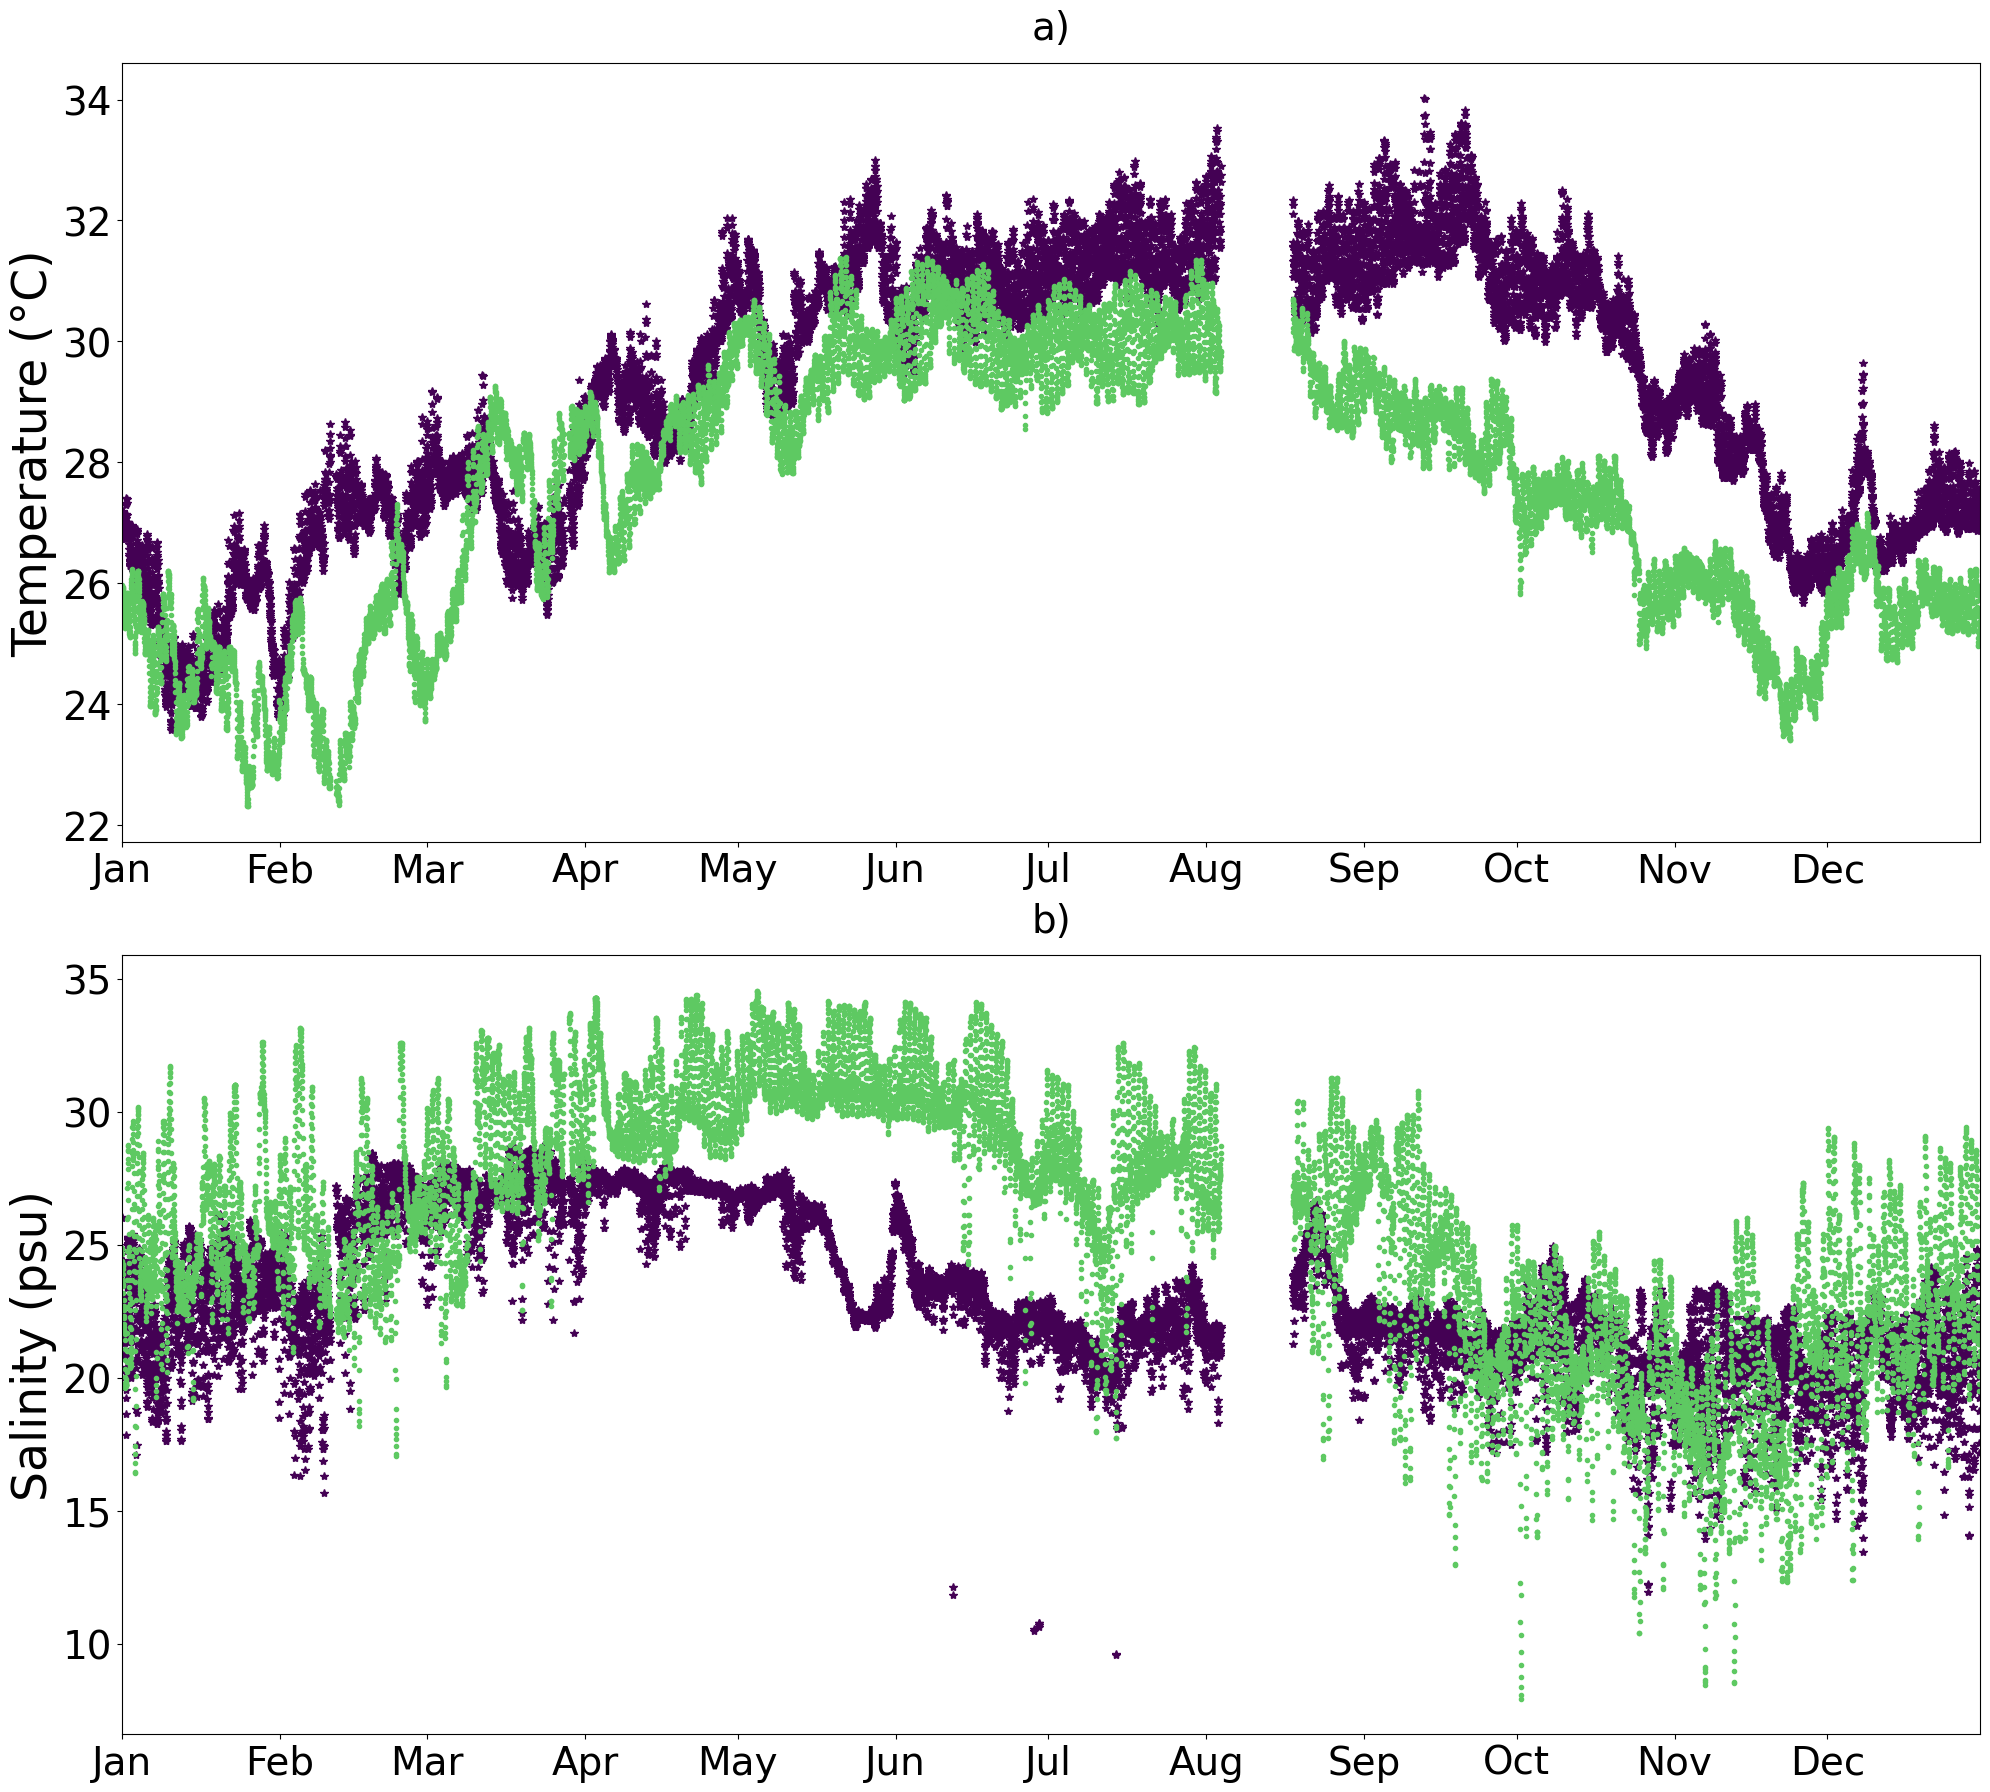

In [36]:
# Create a subplot with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(20, 18))

# Plot data field and temperature 
plot_time_series(terminos_sal_temp, 
                 "Time_model", 
                 "Temp_C_average", 
                 "Temperature_C_model", 
                 "Temperature (°C)",
                 ax=axs[0]  # Plot on the second subplot
                 )
axs[0].set_title('a)', y=1.02, fontsize=28)  # Set title for the first subplot

# Plot data field and model salinity
plot_time_series(terminos_sal_temp, 
                 "Time_model", 
                 "salinity_psu", 
                 "Salinity_psu_model", 
                 "Salinity (psu)",
                 ax=axs[1]  # Plot on the first subplot
                 )
axs[1].set_title('b)', y=1.02, fontsize=28)  # Set title for the second subplot

# Adjust the space between the plots
plt.tight_layout()

# Save the plot to a PDF file
plt.savefig('../output_files/sal_temp_model_vs_data.pdf', format='pdf')

# Show the plot
plt.show()